# 姿勢変換

[参考](https://python.atelierkobato.com/rotation-matrix/)

In [13]:
import numpy as np

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## 2D 空間

In [15]:
# 2D座標設定関数
def coordinate(axes, range_x, range_y, grid = True,
               xyline = True, xlabel = "x", ylabel = "y"):
    axes.set_xlabel(xlabel, fontsize = 16)
    axes.set_ylabel(ylabel, fontsize = 16)
    axes.set_xlim(range_x[0], range_x[1])
    axes.set_ylim(range_y[0], range_y[1])
    if grid == True:
        axes.grid()
    if xyline == True:
        axes.axhline(0, color = "gray")
        axes.axvline(0, color = "gray")

In [16]:
# 2Dベクトル描画関数
def visual_vector(axes, loc, vector, color = "red"):
    axes.quiver(loc[0], loc[1],
              vector[0], vector[1], color = color,
              angles = 'xy', scale_units = 'xy', scale = 1)

In [17]:
# ベクトル回転関数
# deg=Falseならばラジアンで角度を指定
# deg=Trueならば度数単位で角度を指定
def rotation_o(u, theta, deg=False):

    # 度数単位の角度をラジアンに変換
    if deg == True:
        theta = np.deg2rad(theta)

    # 回転行列
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])

    return  np.dot(R, u)

In [18]:
u = (1, 0) # 単位ベクトル
deg = 60 # 度

Ru = rotation_o(u, deg, deg = True)

Text(0.5000000000000001, 0.8660254037844386, 'Ru')

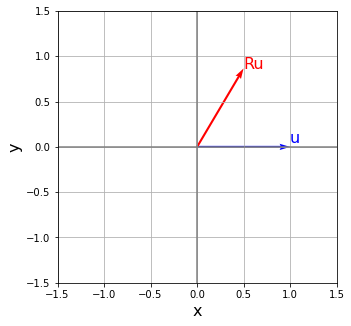

In [19]:
# 描画領域を作成
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
coordinate(ax, [-1.5, 1.5], [-1.5, 1.5])

# uをプロット
visual_vector(ax, (0, 0), u, color="blue")
ax.text(u[0], u[1]+0.05, "u", color="blue", size=16)

# Ruをプロット
visual_vector(ax, (0, 0), Ru, color="red")
ax.text(Ru[0], Ru[1], "Ru", color="red", size=16)

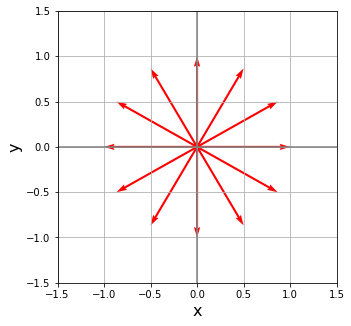

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
coordinate(ax, [-1.5, 1.5], [-1.5, 1.5])

# ベクトルの初期値
Ru = (1, 0)

# 単位ベクトルに繰り返し回転行列を作用させる
for i in range(12):
    Ru = rotation_o(Ru, np.pi/6)
    visual_vector(ax, (0, 0), Ru, color="red")

In [21]:
## 同次変換行列

![bg right 50%](https://raw.githubusercontent.com/rurusasu/Diary/master/%E7%94%BB%E5%83%8F/2021_0517/fig2.png)

In [22]:
# 平面上の任意の点の回転関数
# qに軸の座標を指定
# pに回転させたい点の座標を指定
# tに回転角を指定
def T(p, q, theta, deg=False):

    # 度数単位の角度をラジアンに変換
    if deg == True:
        theta = np.deg2rad(theta)
    
    p = np.append(p, 1).reshape(3, 1)
    q = np.append(q, 1).reshape(3, 1)

    # 回転行列
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    R = np.append(R, [[0, 0],], axis=0)

    # 同次変換行列
    T = np.append(R, q, axis=1), 
    print(T)

    return  np.dot(T, p)

(array([[ 0.5      , -0.8660254,  1.       ],
       [ 0.8660254,  0.5      ,  2.       ],
       [ 0.       ,  0.       ,  1.       ]]),)
[[-1.09807621]
 [ 4.3660254 ]
 [ 1.        ]]


Text([-1.09807621], [4.3660254], 'w_p')

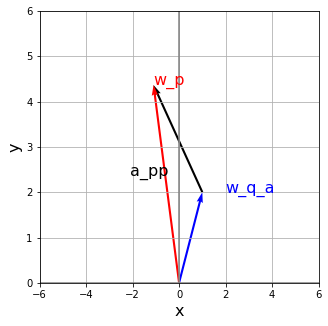

In [23]:
deg = 60 # 度
w_q_a = (1, 2) # 世界座標に対する体内座標の原点
a_p = (1, 3)

w_p = T(a_p, w_q_a, deg, deg=True).reshape((3, 1))

print(w_p)

# 描画領域を作成
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
coordinate(ax, [-6, 6], [0, 6])

# w_q_aをプロット
visual_vector(ax, (0, 0), w_q_a, color="blue")
ax.text(w_q_a[0]+1.0, w_q_a[1], "w_q_a", color="blue", size=16)

# a_pをプロット
#visual_vector(ax, w_q_a, a_p, color="green")
#ax.text(w_q_a[0], w_q_a[1]+1.05, "a_p", color="green", size=16)

# a_p'をプロット
a_pp = rotation_o(a_p, deg, deg = True)
visual_vector(ax, w_q_a, a_pp, color="black")
ax.text(a_pp[0], a_pp[1], "a_pp", color="black", size=16)

# w_pをプロット
visual_vector(ax, (0, 0), w_p, color="red")
ax.text(w_p[0], w_p[1], "w_p", color="red", size=16)